# caustique d'onde

In [1]:
import os
import numpy as np
import MotionClouds as mc
from caustique import init, Caustique

In [2]:
import datetime
date = datetime.datetime.now().date().isoformat()
tag = f'{date}_caustique'
print(f'Tagging our simulations with tag={tag}')

Tagging our simulations with tag=2020-06-18_caustique


In [3]:
opt = init()
opt.tag = tag

In [4]:
opt

Namespace(B_V=2.0, B_sf=0.001, B_theta=0.2617993877991494, H=125.0, V_X=0.5, V_Y=0.5, bin_dens=2, fps=18, nframe=128, nx=640, ny=1024, seed=42, sf_0=0.002, tag='2020-06-18_caustique', theta=1.5707963267948966, verbose=False)

# une simple caustique

In [5]:
gifname = f'{opt.tag}/{opt.tag}.gif'
if not os.path.isfile(gifname):
    c = Caustique(opt)
    z = c.wave()
    gifname = c.plot(z)

In [13]:
z.swapaxes(0, 1).shape

(1024, 640, 128)

In [6]:
if not os.path.isfile(f'{opt.tag}/{opt.tag}.{mc.vext}'):
    c = Caustique(opt)
    z = c.wave()
    mc.anim_save(z.swapaxes(0, 1), f'{opt.tag}/{opt.tag}')
mc.in_show_video(f'{opt.tag}', figpath=f'{opt.tag}')

""


In [7]:
from IPython.display import Image, display
width = 1024
display(Image(url=gifname, width=width))

## exploring parameters

In [8]:
N_scan = 9
base = 4

H = 31.250


H = 44.194


KeyboardInterrupt: 

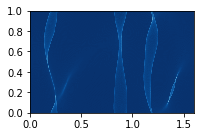

In [9]:
opt = init()
opt.tag = tag
opt.bin_dens = 3
opt.verbose = True

c = Caustique(opt)
z = None
for H_ in c.opt.H*np.logspace(-1, 1, N_scan, base=base):
    print(f'H = {H_:.3f}')
    c.opt.H = H_
    gifname=f'{opt.tag}/{opt.tag}_H={H_:.3f}.gif'
    if not os.path.isfile(gifname):
        if z is None:
            z = c.wave()
        url=c.plot(z, gifname=gifname)
    display(Image(url=gifname, width=width))

In [ ]:
opt = init()

for variable in ['sf_0', 'B_sf', 'B_theta', 'B_V', 'V_X', 'V_Y']:
    print(f'======{variable}======')
    for modul in np.logspace(-1, 1, N_scan, base=base):
        opt = init()
        opt.tag = tag
        opt.bin_dens = 6

        c = Caustique(opt)
        c.d[variable] *= modul

        print(f'{variable}={variable}(default)*{modul:.3f}={c.d[variable]:.3E}')
        gifname = f'{opt.tag}/{opt.tag}_{variable}*={modul:.3f}.gif'
        if not os.path.isfile(gifname):
            z = c.wave()
            if not os.path.isfile(f'{opt.tag}/{opt.tag}_{variable}*={modul:.3f}.{mc.vext}'): 
                mc.anim_save(z.swapaxes(0, 1), f'{opt.tag}/{opt.tag}_{variable}*={modul:.3f}')
            url=c.plot(z, gifname=gifname)
        display(Image(url=gifname, width=width))